In [1]:
#reference:https://www.kaggle.com/datasets/mathurinache/invehicle-coupon-recommendation/code?resource=download

#reference:https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3

#https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3

## Importing required Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
#import missingno as msn

In [2]:
#sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [3]:
# read training dataset

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head(5)

,customer_id,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,258868,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),1d,Male,21,...,1~3,4~8,4~8,never,1,1,0,0,1,1
1,318369,Work,Alone,Sunny,80,7AM,Restaurant(<20),2h,Male,21,...,1~3,4~8,1~3,less1,1,0,0,1,0,0
2,320906,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,Female,21,...,gt8,4~8,1~3,1~3,1,1,0,0,1,0
3,412393,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,26,...,less1,4~8,1~3,never,1,1,1,0,1,0
4,290854,Home,Alone,Snowy,30,6PM,Coffee House,1d,Male,31,...,less1,4~8,less1,never,1,1,0,0,1,0


In [4]:
display(df_train.shape)
df_train.Y.value_counts()

(10147, 27)

1    5768
0    4379
Name: Y, dtype: int64

In [5]:
display(df_test.shape)


(2537, 26)

## Data Quality check

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10147 non-null  int64 
 1   destination           10147 non-null  object
 2   passanger             10147 non-null  object
 3   weather               10147 non-null  object
 4   temperature           10147 non-null  int64 
 5   time                  10147 non-null  object
 6   coupon                10147 non-null  object
 7   expiration            10147 non-null  object
 8   gender                10147 non-null  object
 9   age                   10147 non-null  object
 10  maritalStatus         10147 non-null  object
 11  has_children          10147 non-null  int64 
 12  education             10147 non-null  object
 13  occupation            10147 non-null  object
 14  income                10147 non-null  object
 15  car                   84 non-null   

In [7]:
df_train.describe()

,customer_id,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,10147.000000,10147.000000,10147.000000,10147.0,10147.000000,10147.000000,10147.000000,10147.000000,10147.000000
mean,311272.276831,63.172366,0.412634,1.0,0.563024,0.119838,0.212181,0.787819,0.568444
std,106781.701016,19.232595,0.492332,0.0,0.496037,0.324788,0.408872,0.408872,0.495318
min,123472.000000,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221439.000000,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,310062.000000,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,401537.000000,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,499988.000000,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
num_df = df_train.select_dtypes(include = ['int64','float64'])

cat_df = df_train.select_dtypes(include = ['object'])


In [9]:
# Value Checking
for col in df_test.columns:
    print('Values in Column {}:'.format(col))
    print(df_test[col].unique())
    print()

Values in Column customer_id:
[374679 469678 216140 ... 356159 218541 467387]

Values in Column destination:
['No Urgent Place' 'Home' 'Work']

Values in Column passanger:
['Friend(s)' 'Alone' 'Partner' 'Kid(s)']

Values in Column weather:
['Sunny' 'Rainy' 'Snowy']

Values in Column temperature:
[80 55 30]

Values in Column time:
['6PM' '10AM' '7AM' '10PM' '2PM']

Values in Column coupon:
['Coffee House' 'Carry out & Take away' 'Bar' 'Restaurant(<20)'
 'Restaurant(20-50)']

Values in Column expiration:
['1d' '2h']

Values in Column gender:
['Female' 'Male']

Values in Column age:
['below21' '21' '26' '50plus' '46' '31' '36' '41']

Values in Column maritalStatus:
['Single' 'Unmarried partner' 'Married partner' 'Divorced' 'Widowed']

Values in Column has_children:
[0 1]

Values in Column education:
['Some college - no degree' 'High School Graduate' 'Associates degree'
 'Bachelors degree' 'Graduate degree (Masters or Doctorate)'
 'Some High School']

Values in Column occupation:
['Healthc

In [10]:
df_train.passanger.value_counts()

Alone        5802
Friend(s)    2676
Partner       855
Kid(s)        814
Name: passanger, dtype: int64

In [11]:
df_train.isna().sum()

customer_id                 0
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     10063
Bar                        88
CoffeeHouse               172
CarryAway                 122
RestaurantLessThan20       97
Restaurant20To50          148
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [12]:
df_test.isna().sum()

customer_id                0
destination                0
passanger                  0
weather                    0
temperature                0
time                       0
coupon                     0
expiration                 0
gender                     0
age                        0
maritalStatus              0
has_children               0
education                  0
occupation                 0
income                     0
car                     2513
Bar                       19
CoffeeHouse               45
CarryAway                 29
RestaurantLessThan20      33
Restaurant20To50          41
toCoupon_GEQ5min           0
toCoupon_GEQ15min          0
toCoupon_GEQ25min          0
direction_same             0
direction_opp              0
dtype: int64

In [13]:
# dropping car feature as is it null

df_train.drop(['car'], axis=1, inplace=True)
df_test.drop(['car'], axis=1, inplace=True)

In [14]:
num_df = df_train.select_dtypes(include = ['int64','float64'])

cat_df = df_train.select_dtypes(include = ['object'])



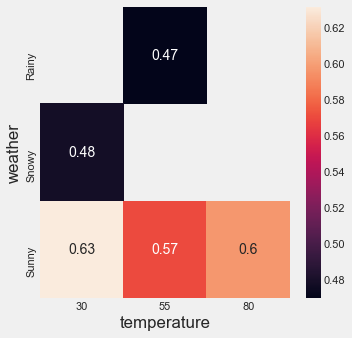

In [15]:
plt.figure(figsize=(5,5))
df_heatmap = df_train.pivot_table(values='Y',index='weather',columns='temperature',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=True)
plt.show()

In [16]:
# fill null values of train data with mode for categoricals

df_train['Bar'] = df_train['Bar'].fillna(df_train['Bar'].mode()[0])
df_train['CoffeeHouse'] = df_train['CoffeeHouse'].fillna(df_train['CoffeeHouse'].mode()[0])
df_train['CarryAway'] = df_train['CarryAway'].fillna(df_train['CarryAway'].mode()[0])
df_train['RestaurantLessThan20'] = df_train['RestaurantLessThan20'].fillna(df_train['RestaurantLessThan20'].mode()[0])
df_train['Restaurant20To50'] = df_train['Restaurant20To50'].fillna(df_train['Restaurant20To50'].mode()[0])

# test data
df_test['Bar'] = df_test['Bar'].fillna(df_test['Bar'].mode()[0])
df_test['CoffeeHouse'] = df_test['CoffeeHouse'].fillna(df_test['CoffeeHouse'].mode()[0])
df_test['CarryAway'] = df_test['CarryAway'].fillna(df_test['CarryAway'].mode()[0])
df_test['RestaurantLessThan20'] = df_test['RestaurantLessThan20'].fillna(df_test['RestaurantLessThan20'].mode()[0])
df_test['Restaurant20To50'] = df_test['Restaurant20To50'].fillna(df_test['Restaurant20To50'].mode()[0])



In [17]:
df_train.isna().sum()

customer_id             0
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [18]:
df_test.isna().sum()

customer_id             0
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
dtype: int64

In [19]:
cat_df = df_train.select_dtypes(include = ['object'])


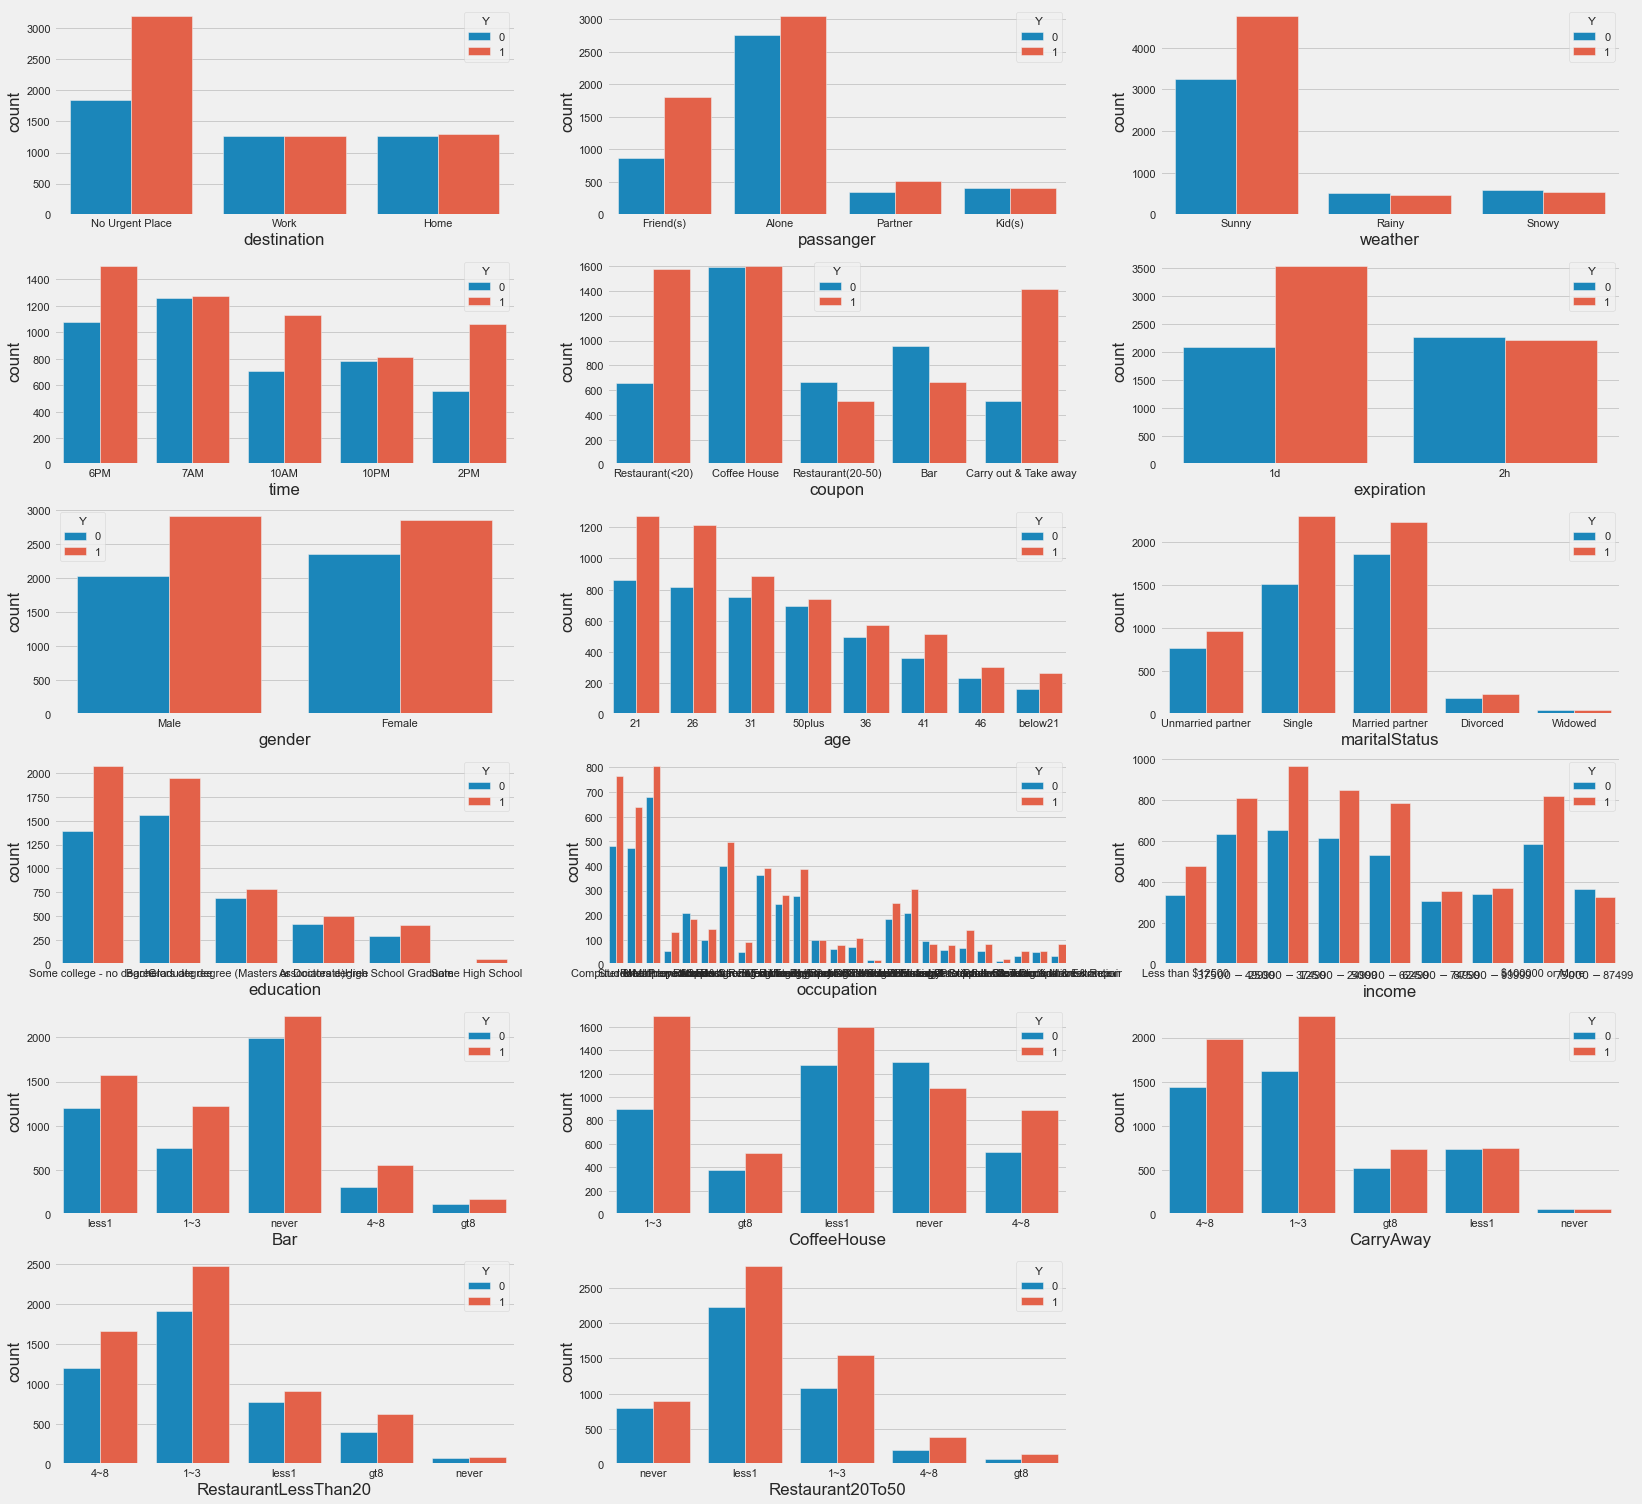

In [20]:
plot_categoricals = cat_df
count = 1
fig, axes = plt.subplots(2,2, figsize=(25,25), sharex=True, sharey=True)
for col in plot_categoricals:
    ax1 = plt.subplot(6,3, count )
    
    sns.countplot(x=col, data=df_train, ax=ax1, hue='Y')
    count += 1
plt.show()

In [21]:
# value is 1. Hence dropping the column
df_train.drop(['toCoupon_GEQ5min'], axis=1, inplace=True)
df_test.drop(['toCoupon_GEQ5min'], axis=1, inplace=True)


In [22]:
cols = df_train.drop(['Y'], axis=1).columns
cols

Index(['customer_id', 'destination', 'passanger', 'weather', 'temperature',
       'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus',
       'has_children', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp'],
      dtype='object')

<AxesSubplot:>

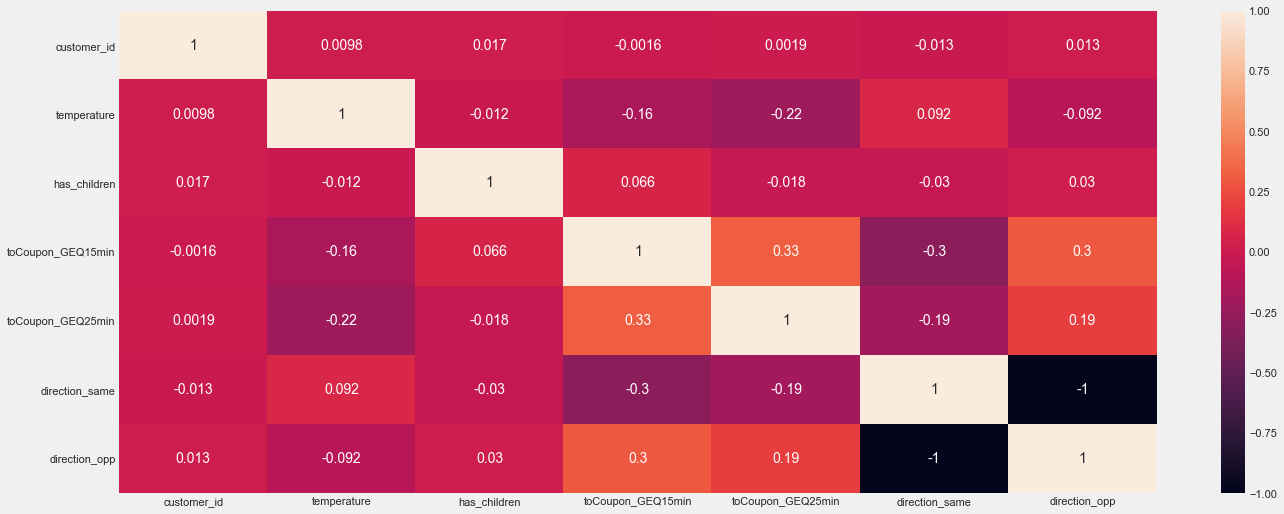

In [23]:
sns.heatmap(df_train[cols].corr(), annot=True)

In [24]:
# direction_same and direction_opp are negatively correlated
# we can remove one of them

#df_train.drop('direction_opp', axis=1, inplace=True)

### Label / One Hot Encoding for the categorical features

In [25]:
num_df = df_train.select_dtypes(include = ['int64','float64'])
num_df.columns

Index(['customer_id', 'temperature', 'has_children', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [26]:
# Value Checking
for col in df_train.columns:
    print('Values in Column {}:'.format(col))
    print(df_train[col].unique())
    print()

Values in Column customer_id:
[258868 318369 320906 ... 173367 488688 431162]

Values in Column destination:
['No Urgent Place' 'Work' 'Home']

Values in Column passanger:
['Friend(s)' 'Alone' 'Partner' 'Kid(s)']

Values in Column weather:
['Sunny' 'Rainy' 'Snowy']

Values in Column temperature:
[80 55 30]

Values in Column time:
['6PM' '7AM' '10AM' '10PM' '2PM']

Values in Column coupon:
['Restaurant(<20)' 'Coffee House' 'Restaurant(20-50)' 'Bar'
 'Carry out & Take away']

Values in Column expiration:
['1d' '2h']

Values in Column gender:
['Male' 'Female']

Values in Column age:
['21' '26' '31' '50plus' '36' '41' '46' 'below21']

Values in Column maritalStatus:
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

Values in Column has_children:
[0 1]

Values in Column education:
['Some college - no degree' 'Bachelors degree'
 'Graduate degree (Masters or Doctorate)' 'Associates degree'
 'High School Graduate' 'Some High School']

Values in Column occupation:
['Student

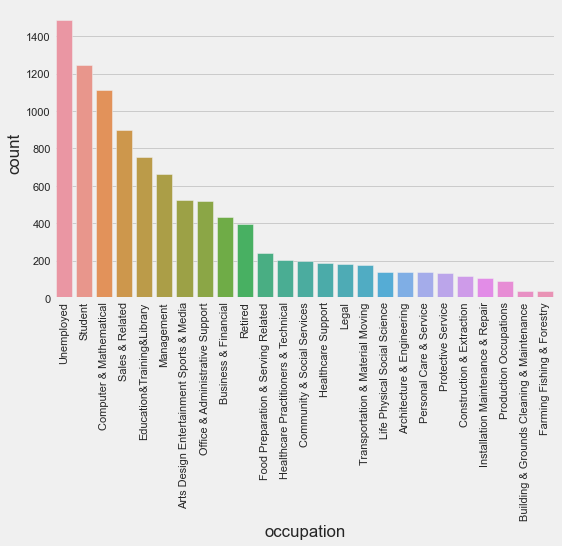

In [27]:
fig, axes = plt.subplots(1,1, figsize=(8,5), sharex=True, sharey=True)


sns.countplot(x='occupation', data=df_train, order=df_train['occupation'].value_counts().index)
plt.xticks(rotation=90);

In [28]:
others = ['Student' ,'Unemployed' ,'Retired' ]

# all other occupation will be termed as employed
# label encoding values as
# Student = 0
# UnEmployed = 1
# Retired = 3
# All others are considered as Employed and assigned a value of 2

def occpn_employed(occupation):
    #display(occupation)
    if occupation not in others:
        
        return 2
    elif occupation == 'Student':
        return 0
    elif occupation == 'Unemployed':
        return 1
    else :
        return 3

In [29]:
# train Data
df_train['occupation'] = df_train['occupation'].apply(occpn_employed)
df_train.head()

# test data
df_test['occupation'] = df_test['occupation'].apply(occpn_employed)
df_test.head()



,customer_id,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,374679,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,1d,Female,below21,...,Less than $12500,never,1~3,less1,4~8,less1,0,0,0,1
1,469678,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,21,...,$12500 - $24999,1~3,never,gt8,4~8,1~3,1,0,1,0
2,216140,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Female,26,...,$25000 - $37499,never,never,1~3,less1,never,1,0,0,1
3,184301,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Male,50plus,...,$50000 - $62499,never,4~8,4~8,1~3,less1,1,0,0,1
4,148720,Work,Alone,Sunny,30,7AM,Carry out & Take away,1d,Female,26,...,$75000 - $87499,never,never,1~3,4~8,less1,1,0,0,1


In [30]:
# Label encoding of categoricals 
# Drop the first column to reduce the number of features

# train data
df_dest = pd.get_dummies(df_train['destination'], prefix='dest')
display(df_dest.head())
df_pass = pd.get_dummies(df_train['passanger'], prefix='pass')
df_weather = pd.get_dummies(df_train['weather'], prefix='weather')
df_coupon = pd.get_dummies(df_train['coupon'], prefix='coupon')
df_gender = pd.get_dummies(df_train['gender'], prefix='gender')
df_mar = pd.get_dummies(df_train['maritalStatus'], prefix='mar')

new_features = pd.DataFrame()
new_features = pd.concat((new_features, df_dest), axis=1)
new_features = pd.concat((new_features, df_pass), axis=1)
new_features = pd.concat((new_features, df_weather), axis=1)
new_features = pd.concat((new_features, df_coupon), axis=1)
new_features = pd.concat((new_features, df_gender), axis=1)
new_features = pd.concat((new_features, df_mar), axis=1)

,dest_Home,dest_No Urgent Place,dest_Work
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,1,0,0


In [31]:
# concat columns from new features to the pre_process_data if the columns dont already exist.
# if they exist, drop them and add 

for new_col in new_features.columns:
    if new_col in df_train.columns:
        df_train.drop(new_col, axis=1, inplace=True)
        
df_train = pd.concat((df_train, new_features), axis=1)    

df_train.drop(['destination', 'passanger', 
                       'weather', 'coupon', 'gender', 'maritalStatus']  , axis=1, inplace=True)


In [32]:
# Label encoding of categoricals 
# Drop the first column to reduce the number of features

# test data
df_dest = pd.get_dummies(df_test['destination'], prefix='dest')
df_pass = pd.get_dummies(df_test['passanger'], prefix='pass')
df_weather = pd.get_dummies(df_test['weather'], prefix='weather')
df_coupon = pd.get_dummies(df_test['coupon'], prefix='coupon')
df_gender = pd.get_dummies(df_test['gender'], prefix='gender')
df_mar = pd.get_dummies(df_test['maritalStatus'], prefix='mar')

new_features = pd.DataFrame()
new_features = pd.concat((new_features, df_dest), axis=1)
new_features = pd.concat((new_features, df_pass), axis=1)
new_features = pd.concat((new_features, df_weather), axis=1)
new_features = pd.concat((new_features, df_coupon), axis=1)
new_features = pd.concat((new_features, df_gender), axis=1)
new_features = pd.concat((new_features, df_mar), axis=1)

In [33]:
df_train.columns

Index(['customer_id', 'temperature', 'time', 'expiration', 'age',
       'has_children', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y', 'dest_Home', 'dest_No Urgent Place', 'dest_Work',
       'pass_Alone', 'pass_Friend(s)', 'pass_Kid(s)', 'pass_Partner',
       'weather_Rainy', 'weather_Snowy', 'weather_Sunny', 'coupon_Bar',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'gender_Female',
       'gender_Male', 'mar_Divorced', 'mar_Married partner', 'mar_Single',
       'mar_Unmarried partner', 'mar_Widowed'],
      dtype='object')

In [34]:
df_test.columns

Index(['customer_id', 'destination', 'passanger', 'weather', 'temperature',
       'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus',
       'has_children', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp'],
      dtype='object')

In [35]:
for new_col in new_features.columns:
    if new_col in df_test.columns:
            df_test.drop(new_col, axis=1, inplace=True)
        
        
df_test = pd.concat((df_test, new_features), axis=1)  

df_test.drop(['destination', 'passanger', 
                       'weather', 'coupon', 'gender', 'maritalStatus']  , axis=1, inplace=True)

In [36]:
#train data

df_train['age'] = df_train['age'].replace('50plus', '51').replace('below21', '20')
df_train['age'].value_counts()

# test data
df_test['age'] = df_test['age'].replace('50plus', '51').replace('below21', '20')


In [37]:
df_train['age'] = df_train['age'].astype('int64')
df_test['age'] = df_test['age'].astype('int64')


In [38]:
# create bins
df_train['age'].unique()

array([21, 26, 31, 51, 36, 41, 46, 20], dtype=int64)

<Figure size 576x288 with 0 Axes>

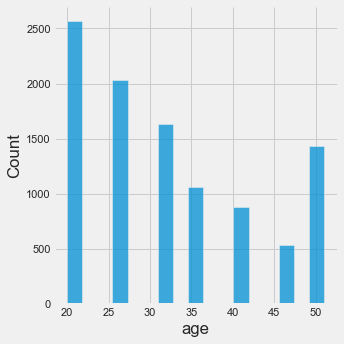

In [39]:
plt.figure(figsize=(8,4))
sns.displot(x='age', data=df_train)

plt.show()

In [40]:
bins = [0,20,35,50, 100]
labels = [0,1,2,3]
df_train['age'] = pd.cut(df_train.age, bins=bins, labels=labels, include_lowest=True)
df_test['age'] = pd.cut(df_test.age, bins=bins, labels=labels, include_lowest=True)

In [41]:
df_train['age'] = df_train['age'].astype('int64')
df_test['age']  = df_test['age'].astype('int64')

In [42]:
# label encoding of Education 

replacer= {"education":{"Some High School": 1, 
                    "High School Graduate": 2,
                    "Some college - no degree": 3,
                    "Associates degree": 4,
                    "Bachelors degree": 5,
                    "Graduate degree (Masters or Doctorate)": 6,
          }}
df_train = df_train.replace(replacer)
df_test = df_test.replace(replacer)



In [43]:
# income

In [44]:
# bar

# label encoding of Education 

replacer= {"Bar":{"never": 1, 
                    "less1": 2,
                    "1~3": 3,
                    "4~8": 4,
                    "gt8": 5
          }}
df_train = df_train.replace(replacer)
df_test = df_test.replace(replacer)



In [45]:

replacer= {"CoffeeHouse":{"never": 1, 
                    "less1": 2,
                    "1~3": 3,
                    "4~8": 4,
                    "gt8": 5
          }}
df_train = df_train.replace(replacer)
df_test = df_test.replace(replacer)



In [46]:

replacer= {"CarryAway":{"never": 1, 
                    "less1": 2,
                    "1~3": 3,
                    "4~8": 4,
                    "gt8": 5
          }}
df_train = df_train.replace(replacer)
df_test = df_test.replace(replacer)



In [47]:

replacer= {"RestaurantLessThan20":{"never": 1, 
                    "less1": 2,
                    "1~3": 3,
                    "4~8": 4,
                    "gt8": 5
          }}
df_train = df_train.replace(replacer)
df_test = df_test.replace(replacer)



In [48]:

replacer= {"Restaurant20To50":{"never": 1, 
                    "less1": 2,
                    "1~3": 3,
                    "4~8": 4,
                    "gt8": 5
          }}
df_train = df_train.replace(replacer)
df_test = df_test.replace(replacer)


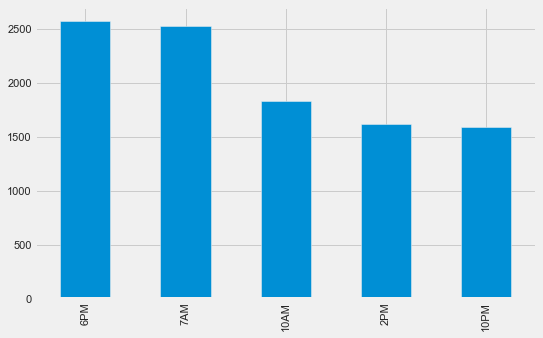

In [49]:
fig, axes = plt.subplots(1,1, figsize=(8,5), sharex=True, sharey=True)

df_train["time"].value_counts().plot(kind='bar')
#sns.countplot(x='occupation', data=df_train, ax=axes)
plt.xticks(rotation=90);

In [50]:


replacer= {"time":{"7AM": 1, 
                    "10AM": 2,
                    "2PM": 3,
                    "6PM": 4,
                    "10PM": 5
          }}
df_train = df_train.replace(replacer)
df_test = df_test.replace(replacer)


In [51]:

replacer= {"expiration":{"1d": 1, 
                    "2h": 2

          }}
df_train = df_train.replace(replacer)
df_test = df_test.replace(replacer)


In [52]:
df_train['income'].unique()

array(['Less than $12500', '$37500 - $49999', '$25000 - $37499',
       '$12500 - $24999', '$50000 - $62499', '$62500 - $74999',
       '$87500 - $99999', '$100000 or More', '$75000 - $87499'],
      dtype=object)

In [53]:

replacer= {"income":{"Less than $12500": 1, 
                    "$12500 - $24999": 2,
                    "$25000 - $37499": 3,
                    "$37500 - $49999": 4,
                    "$50000 - $62499": 5,
                    "$62500 - $74999": 6,
                    "$75000 - $87499": 7,
                    "$87500 - $99999": 8,
                    "$100000 or More": 9,
                     
                     
          }}
df_train = df_train.replace(replacer)
df_test = df_test.replace(replacer)


In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   customer_id                   10147 non-null  int64
 1   temperature                   10147 non-null  int64
 2   time                          10147 non-null  int64
 3   expiration                    10147 non-null  int64
 4   age                           10147 non-null  int64
 5   has_children                  10147 non-null  int64
 6   education                     10147 non-null  int64
 7   occupation                    10147 non-null  int64
 8   income                        10147 non-null  int64
 9   Bar                           10147 non-null  int64
 10  CoffeeHouse                   10147 non-null  int64
 11  CarryAway                     10147 non-null  int64
 12  RestaurantLessThan20          10147 non-null  int64
 13  Restaurant20To50              1

In [55]:
df_train.columns

Index(['customer_id', 'temperature', 'time', 'expiration', 'age',
       'has_children', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y', 'dest_Home', 'dest_No Urgent Place', 'dest_Work',
       'pass_Alone', 'pass_Friend(s)', 'pass_Kid(s)', 'pass_Partner',
       'weather_Rainy', 'weather_Snowy', 'weather_Sunny', 'coupon_Bar',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'gender_Female',
       'gender_Male', 'mar_Divorced', 'mar_Married partner', 'mar_Single',
       'mar_Unmarried partner', 'mar_Widowed'],
      dtype='object')

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   customer_id                   10147 non-null  int64
 1   temperature                   10147 non-null  int64
 2   time                          10147 non-null  int64
 3   expiration                    10147 non-null  int64
 4   age                           10147 non-null  int64
 5   has_children                  10147 non-null  int64
 6   education                     10147 non-null  int64
 7   occupation                    10147 non-null  int64
 8   income                        10147 non-null  int64
 9   Bar                           10147 non-null  int64
 10  CoffeeHouse                   10147 non-null  int64
 11  CarryAway                     10147 non-null  int64
 12  RestaurantLessThan20          10147 non-null  int64
 13  Restaurant20To50              1

In [57]:
cols = df_train.drop(['Y'], axis=1).columns
cols

Index(['customer_id', 'temperature', 'time', 'expiration', 'age',
       'has_children', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'dest_Home', 'dest_No Urgent Place', 'dest_Work',
       'pass_Alone', 'pass_Friend(s)', 'pass_Kid(s)', 'pass_Partner',
       'weather_Rainy', 'weather_Snowy', 'weather_Sunny', 'coupon_Bar',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'gender_Female',
       'gender_Male', 'mar_Divorced', 'mar_Married partner', 'mar_Single',
       'mar_Unmarried partner', 'mar_Widowed'],
      dtype='object')

<AxesSubplot:>

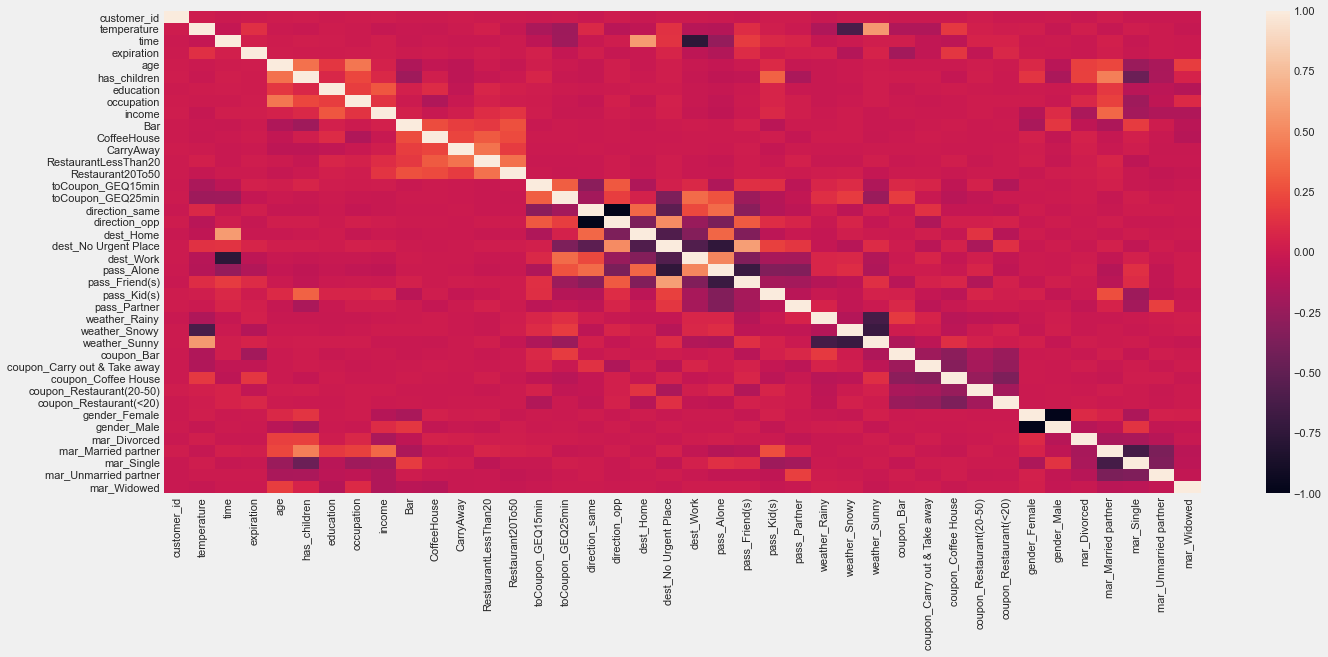

In [58]:
sns.heatmap(df_train[cols].corr())

### Correlation between features

In [59]:
#sns.countplot(x='destination', data=df_train, hue='Y');

sns.heatmap(df_train['direction_same','direction_opp'].corr())

np.corrcoef(df_train['direction_same'], df_train['direction_opp'])

In [60]:
df_train.head()


,customer_id,temperature,time,expiration,age,has_children,education,occupation,income,Bar,...,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),gender_Female,gender_Male,mar_Divorced,mar_Married partner,mar_Single,mar_Unmarried partner,mar_Widowed
0,258868,80,4,1,1,0,3,0,1,2,...,0,0,1,0,1,0,0,0,1,0
1,318369,80,1,2,1,0,5,0,4,2,...,0,0,1,0,1,0,0,1,0,0
2,320906,80,2,2,1,0,3,0,1,2,...,1,0,0,1,0,0,1,0,0,0
3,412393,55,1,2,1,0,5,2,3,2,...,0,0,1,1,0,0,0,1,0,0
4,290854,30,4,1,1,0,3,1,2,3,...,1,0,0,0,1,0,0,1,0,0


In [61]:
df_train.to_csv('Data_Preprocess_Train.csv', index=False)
df_test.to_csv('Data_Preprocess_Test.csv', index=False)